<a href="https://colab.research.google.com/github/SravaniChowdaryy/Skill-Vertex-Major-Project/blob/main/Major_Project-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SKILLVERTEX DATA SCIENCE INTERNSHIP -

STARTUPS DATASET-PERFORMING EDA,DATA CLEANING(DATA PREPROCESSING),DATA VISUALIZATION

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading dataset
data=pd.read_csv("startup_funding.csv")

In [ ]:
#Loads all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#Understanding the data
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
data.shape

(3044, 10)

In [ ]:
data.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
#Shows total number of uniques values 
data.nunique()

Sr No                3044
Date dd/mm/yyyy      1035
Startup Name         2459
Industry Vertical     821
SubVertical          1942
City  Location        112
Investors Name       2412
InvestmentnType        55
Amount in USD         471
Remarks                72
dtype: int64

# CLEANING THE DATA

In [ ]:
#Gives the percentage of missing values in  dataset
missing_value_per=data.isnull().sum()/data.shape[0]*100

# lets calculate the total missing values in the data
data.isnull().sum()

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([data.isnull().sum(), missing_value_per], axis=1, keys=['Total Missing Values', 'Percent %'])

# lets check the head of the data
missing_data

,Total Missing Values,Percent %
Sr No,0,0.000000
Date dd/mm/yyyy,0,0.000000
Startup Name,0,0.000000
Industry Vertical,171,5.617608
SubVertical,936,30.749014
City Location,180,5.913272
Investors Name,24,0.788436
InvestmentnType,4,0.131406
Amount in USD,960,31.537451
Remarks,2625,86.235217


<AxesSubplot:>

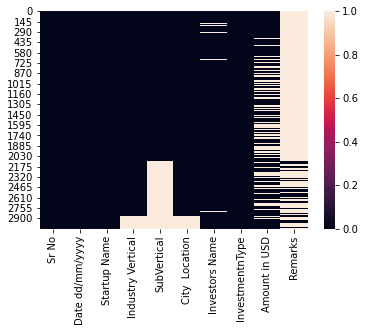

In [ ]:
#White spot in the figure represent presense of null values
#plt.figure(figsize=(25,25))
sns.heatmap(data.isnull())

# NUMERIC DATASET - DATA CLEANING AND PREPROCESSING

In [ ]:
#Gives the variables which has numeric datavalues in it
data_num=data.select_dtypes(include=['int64','float64'])
data_num.head()

,Sr No
0,1
1,2
2,3
3,4
4,5


In [ ]:
data_num.isnull().sum()

Sr No    0
dtype: int64

# CATEGORICAL DATASET-DATA CLEANING AND PREPROCESSING

In [ ]:
#Gives the variables which has categorical datavalues in it
data_cat=data.select_dtypes(include=['object']).columns
data_cat

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'Remarks'],
      dtype='object')

In [ ]:
#Gives the variables which has categorical datavalues in it
data_cat=data.select_dtypes(include=['object'])
data_cat.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
#Gives missing percentage in categorical dataset
missing_value_cat_per=data_cat.isnull().mean()*100
missing_value_cat_per

Date dd/mm/yyyy       0.000000
Startup Name          0.000000
Industry Vertical     5.617608
SubVertical          30.749014
City  Location        5.913272
Investors Name        0.788436
InvestmentnType       0.131406
Amount in USD        31.537451
Remarks              86.235217
dtype: float64

In [ ]:
pd.concat([data_cat.isnull().sum(), missing_value_cat_per], axis=1, keys=['Total Missing Values', 'Percent %'])

,Total Missing Values,Percent %
Date dd/mm/yyyy,0,0.000000
Startup Name,0,0.000000
Industry Vertical,171,5.617608
SubVertical,936,30.749014
City Location,180,5.913272
Investors Name,24,0.788436
InvestmentnType,4,0.131406
Amount in USD,960,31.537451
Remarks,2625,86.235217


In [ ]:
#Gives the names of columns what has more that 20% null values in it
missing_value_clm_gre_20=missing_value_per[missing_value_per>20].keys()
missing_value_clm_gre_20

Index(['SubVertical', 'Amount in USD', 'Remarks'], dtype='object')

In [ ]:
#Dropping columns which has null values more than 20% in it
new_data=data.drop(columns=missing_value_clm_gre_20)
new_data.shape

(3044, 7)

In [ ]:
#Gives the names of variables which has missing values in it
isnull_per=new_data.isnull().mean()*100
miss_vars=isnull_per[isnull_per>0].keys()
miss_vars

Index(['Industry Vertical', 'City  Location', 'Investors Name',
       'InvestmentnType'],
      dtype='object')

In [ ]:
#Fills the null values with mode and gives the name of the mode
for var in miss_vars:
    new_data[var].fillna(new_data[var].mode()[0],inplace=True)
    print(var,"=",new_data[var].mode()[0])

Industry Vertical = Consumer Internet
City  Location = Bangalore
Investors Name = Undisclosed Investors
InvestmentnType = Private Equity


In [ ]:
#Gives the count of null values
new_data.isnull().sum()

Sr No                0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
City  Location       0
Investors Name       0
InvestmentnType      0
dtype: int64

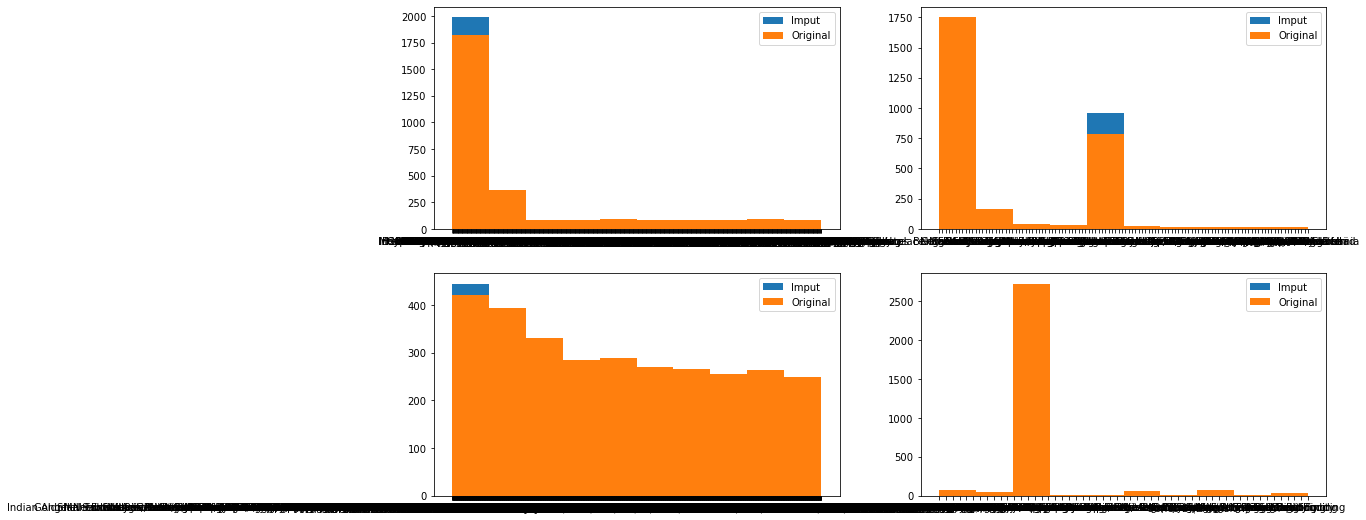

In [ ]:
plt.figure(figsize=(16,9))
for i,var in enumerate(miss_vars):
    #There are 4 variable so 2 multiplied to 2 = 4
    plt.subplot(2,2,i+1)
    plt.hist(new_data[var],label='Imput')
    #Removes null values and plot the histogram 
    plt.hist(data[var].dropna(),label='Original')
    #It shows label
    plt.legend()

In [ ]:
new_data.update(new_data)

In [ ]:
new_data.isnull().sum().sum()

0

In [ ]:
new_data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType
0,1,09/01/2020,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round
1,2,13/01/2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C
2,3,09/01/2020,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A
4,5,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round


# EDA and DATA VISUALIZATIONS

# Which Kind of Industries are more preferred for Startups?

Consumer Internet    1112
Technology            478
eCommerce             186
Healthcare             70
Finance                62
ECommerce              61
Logistics              32
E-Commerce             29
Education              24
Food & Beverage        23
Name: Industry Vertical, dtype: int64


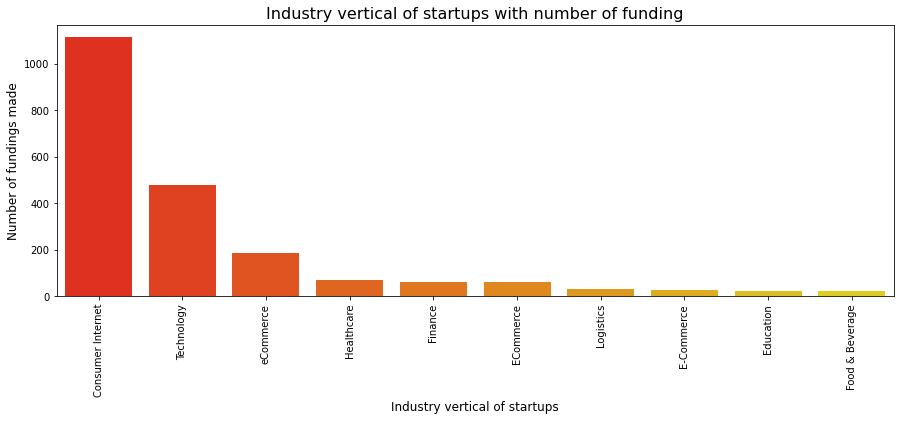

In [ ]:
 #lets analyze the Industry of the Startups

# data cleaning
new_data['Industry Vertical'] = new_data['Industry Vertical'].replace('nan', 'Consumer Technology')

industry = new_data['Industry Vertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Education                                         5
Online lending platform                           5
Online Education Platform                         5
Online Learning Platform                          5
Online Lending                                    5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Online Food Delivery Platform                     3
Online Insurance Platform                         3
SaaS                                              3
ECommerce Marketplace                             3
Online Marketplace                                3
Online learning platform                          3
Online Payment Gateway                            3
B2B Marketplace                                   3
Agri-tech                                         3
Online Insur

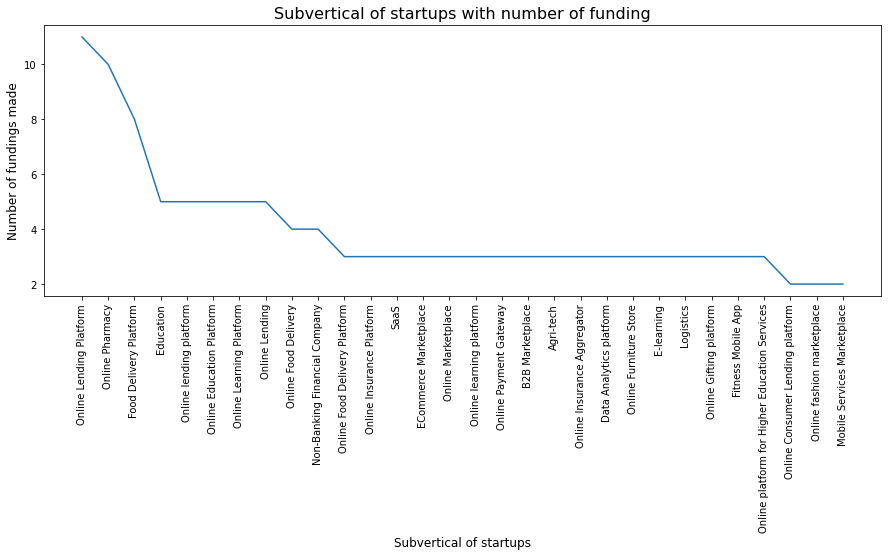

In [ ]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts().head(30)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

# Which Kind of City Location  are more preferred for Startups?

Bangalore    880
Mumbai       567
New Delhi    421
Gurgaon      287
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         92
Gurugram      50
Name: City  Location, dtype: int64


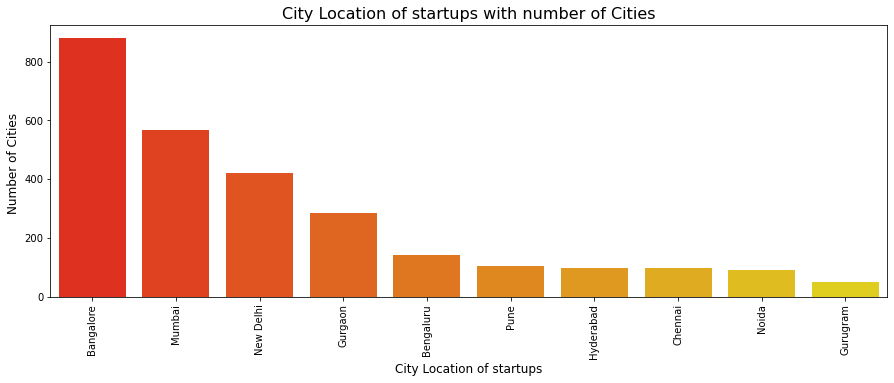

In [ ]:
 #lets analyze the City Location of the Startups

City = new_data['City  Location'].value_counts().head(10)
print(City)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(City.index, City.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('City Location of startups', fontsize=12)
plt.ylabel('Number of Cities ', fontsize=12)
plt.title("City Location of startups with number of Cities", fontsize=16)
plt.show()

# Which Kind of Investment Type are more preferred for Startups?

Private Equity          1360
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentnType, dtype: int64


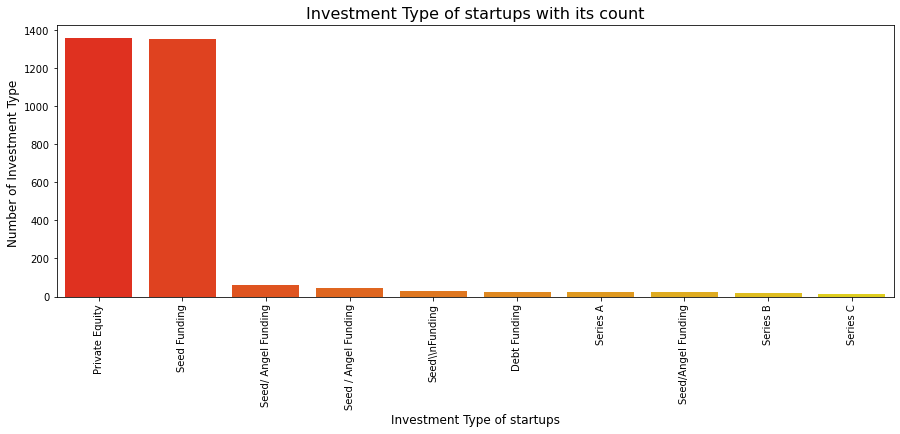

In [ ]:
 #lets analyze the Investment Type of the Startups

Type = new_data['InvestmentnType'].value_counts().head(10)
print(Type)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(Type.index, Type.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type of startups', fontsize=12)
plt.ylabel('Number of Investment Type ', fontsize=12)
plt.title("Investment Type of startups with its count", fontsize=16)
plt.show()

# What is the Number of Fundings that Startups get in India?

Total startups funded :  2459
Swiggy           8
Ola Cabs         8
Paytm            7
NoBroker         6
UrbanClap        6
Meesho           6
Medinfi          6
Nykaa            6
Capital Float    5
Jugnoo           5
Name: Startup Name, dtype: int64


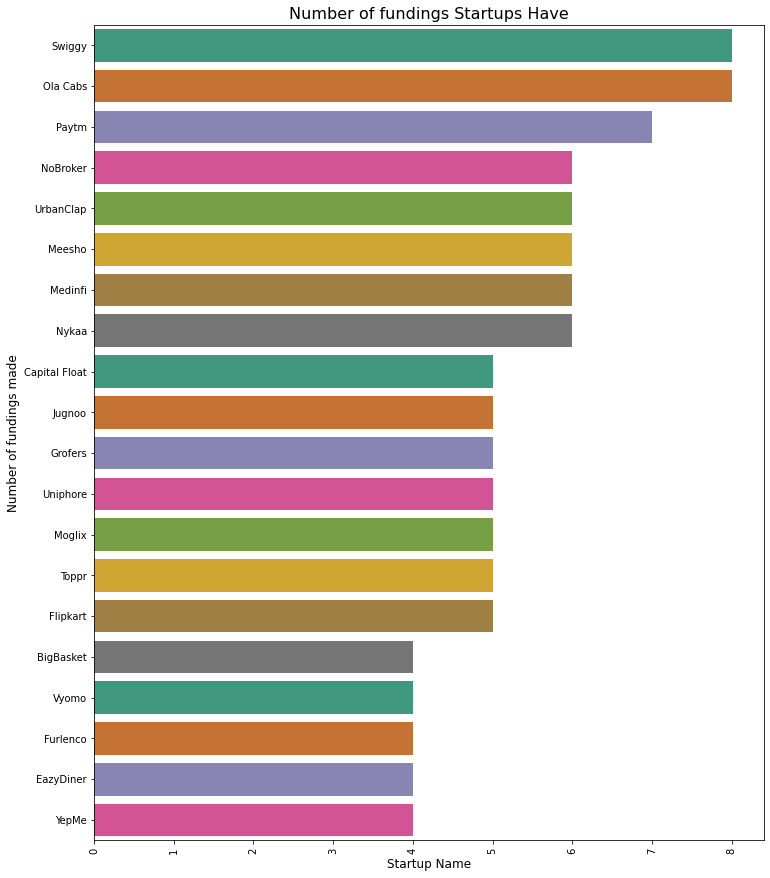

In [ ]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(data["Startup Name"].unique()))
print(data["Startup Name"].value_counts().head(10))
startupname = data['Startup Name'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

# Lets analyze the investors on startups?

Undisclosed Investors       63
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        23
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             15
Accel Partners              12
Undisclosed Investor        12
undisclosed investors       11
Name: Investors Name, dtype: int64


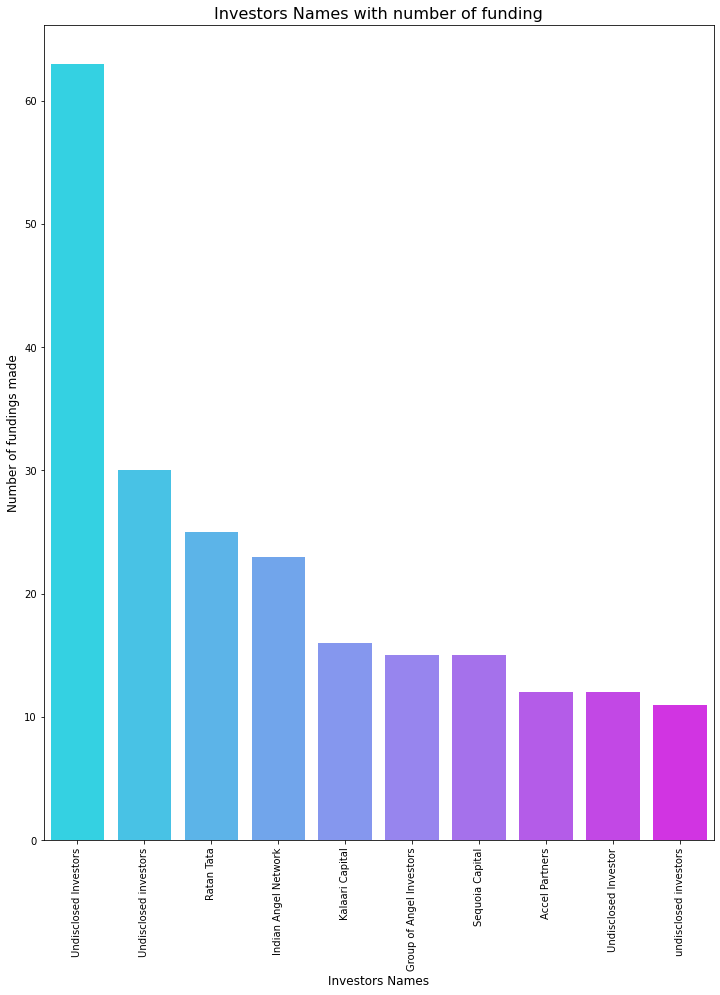

In [ ]:
# lets check the value counts
investors = new_data['Investors Name'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

# How Does the Funding Ecosystem changes with respect to Time?

02/02/2015    11
30/11/2016    11
08/07/2015    11
04/10/2016    10
08/02/2016     9
21/06/2016     9
23/07/2015     9
24/08/2016     9
22/01/2016     9
29/01/2016     9
01/06/2015     9
04/05/2016     9
22/12/2015     8
08/06/2016     8
06/08/2015     8
04/03/2016     8
03/11/2015     8
10/08/2015     8
03/06/2015     8
17/08/2015     8
13/07/2016     8
22/09/2015     8
15/04/2016     8
19/01/2016     8
19/01/2015     8
10/12/2015     8
11/12/2015     8
19/05/2015     8
10/02/2016     8
05/02/2016     8
15/02/2016     8
12/05/2016     7
23/04/2015     7
05/08/2015     7
22/03/2016     7
29/09/2015     7
09/03/2016     7
30/07/2015     7
06/01/2016     7
22/02/2016     7
17/04/2017     7
03/08/2015     7
21/11/2017     7
19/04/2016     7
30/10/2015     7
07/12/2016     7
09/10/2015     7
04/09/2019     7
29/04/2015     7
06/11/2015     7
Name: Date dd/mm/yyyy, dtype: int64


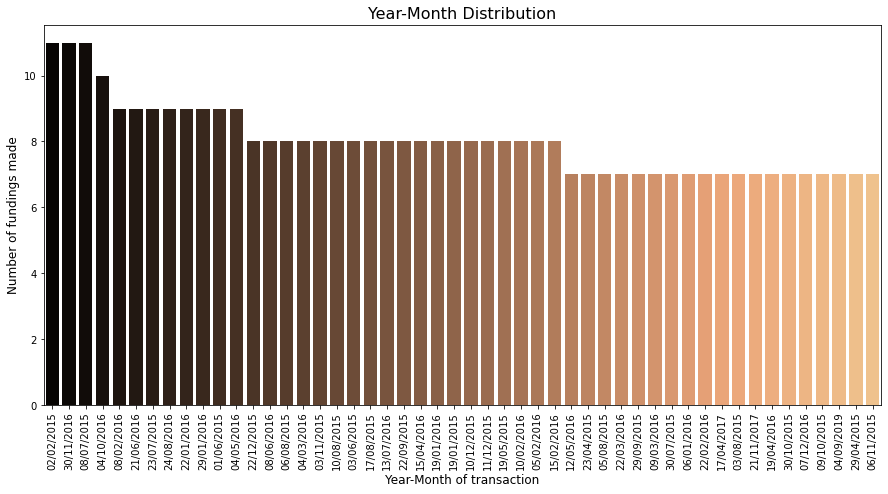

In [ ]:
# lets check the value counts
year_month = new_data['Date dd/mm/yyyy'].value_counts().head(50)
print(year_month)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()